# Stroke Prediction 

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

--Dataset Copyrights: https://www.kaggle.com/fedesoriano

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset

data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# Null value percentage in bmi column:

data['bmi'].isnull().sum() / len(data) * 100

3.9334637964774952

In [5]:
# Since the null value percentage is too low, we can drop the records.

data['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.7    37
26.1    37
        ..
13.9     1
49.9     1
40.6     1
52.3     1
44.1     1
Name: bmi, Length: 418, dtype: int64

In [6]:
# data['bmi'].median()

In [7]:
data = data[~np.isnan(data['bmi'])]

In [8]:
# data['bmi'] = data['bmi'].fillna(data['bmi'].median())

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [10]:
data['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

In [11]:
len(data[data['smoking_status'] == 'Unknown']) / len(data) * 100

30.209818700346304

#### Since the null values are already categorized as 'Unknown', we will keep it as such and proceed.

In [12]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [13]:
data['work_type'].value_counts()

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

In [14]:
data['Residence_type'].value_counts()

Urban    2490
Rural    2419
Name: Residence_type, dtype: int64

In [15]:
data['ever_married'].value_counts()

Yes    3204
No     1705
Name: ever_married, dtype: int64

In [16]:
data['gender'].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [17]:
# Since there is only one value with Gender other, we can drop it. 
# Because this will lead to creating one extra variable during model building.

data = data[-(data['gender'] == 'Other')]

In [18]:
data['gender'].value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

In [19]:
data['stroke'].value_counts()

0    4699
1     209
Name: stroke, dtype: int64

In [20]:
data['hypertension'].value_counts()

0    4457
1     451
Name: hypertension, dtype: int64

#### We can see that the column age has values which will be easy to handle if made into buckets

In [21]:
data['age'].describe()

count    4908.000000
mean       42.868810
std        22.556128
min         0.080000
25%        25.000000
50%        44.000000
75%        60.000000
max        82.000000
Name: age, dtype: float64

In [22]:
data.age.loc[(data.age > 100)]

Series([], Name: age, dtype: float64)

In [23]:
data.age.loc[(data.age < 0)].count()

0

In [24]:
data.age.loc[(data.age > 80)].count()

115

In [25]:
data.age.loc[(data.age > 90)].count()

0

In [26]:
data.age.loc[(data.age < 10) & (data.stroke == 1)].count()

0

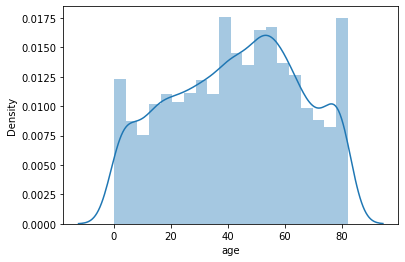

In [27]:
sns.distplot(data.age)
plt.show()

In [28]:
bins = [0, 20, 40, 60, 80, 1000]
labels = ['0-20', '20-40', '40-60', '60-80', '80+']
data['AgeGroup'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

In [29]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,AgeGroup
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,60-80
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,80+
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,40-60
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,60-80
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,80+


In [30]:
data['AgeGroup'].value_counts()

40-60    1510
20-40    1169
60-80    1103
0-20      944
80+       182
Name: AgeGroup, dtype: int64

In [31]:
data.drop('age', axis=1, inplace=True)

In [32]:
data.head()

,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,AgeGroup
0,9046,Male,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,60-80
2,31112,Male,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,80+
3,60182,Female,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,40-60
4,1665,Female,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,60-80
5,56669,Male,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,80+


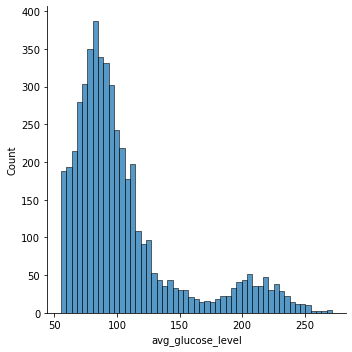

In [33]:
sns.displot(data.avg_glucose_level)
plt.show()

In [34]:
data.avg_glucose_level.describe()

count    4908.000000
mean      105.297402
std        44.425550
min        55.120000
25%        77.067500
50%        91.680000
75%       113.495000
max       271.740000
Name: avg_glucose_level, dtype: float64

#### As we can see, the minimum blood sugar level is around 55 which is completely normal. Hence we will create category accordingly.

In [35]:
bins = [0, 100, 150, 200, 250, 1000]
labels = ['< 100', '100-150', '150-200', '200-250', '250+']
data['GlucoseLevelRange'] = pd.cut(data['avg_glucose_level'], bins=bins, labels=labels, right=False)

In [36]:
data.head()

,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,AgeGroup,GlucoseLevelRange
0,9046,Male,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,60-80,200-250
2,31112,Male,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,80+,100-150
3,60182,Female,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,40-60,150-200
4,1665,Female,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,60-80,150-200
5,56669,Male,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,80+,150-200


In [37]:
data.GlucoseLevelRange.value_counts()

< 100      3030
100-150    1212
200-250     368
150-200     275
250+         23
Name: GlucoseLevelRange, dtype: int64

In [38]:
data.drop('avg_glucose_level', axis=1, inplace=True)

In [39]:
data.head()

,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,stroke,AgeGroup,GlucoseLevelRange
0,9046,Male,0,1,Yes,Private,Urban,36.6,formerly smoked,1,60-80,200-250
2,31112,Male,0,1,Yes,Private,Rural,32.5,never smoked,1,80+,100-150
3,60182,Female,0,0,Yes,Private,Urban,34.4,smokes,1,40-60,150-200
4,1665,Female,1,0,Yes,Self-employed,Rural,24.0,never smoked,1,60-80,150-200
5,56669,Male,0,0,Yes,Private,Urban,29.0,formerly smoked,1,80+,150-200


In [40]:
# We can drop the id column as it will be of no use.

data.drop('id', axis=1, inplace=True)

In [41]:
data.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,stroke,AgeGroup,GlucoseLevelRange
0,Male,0,1,Yes,Private,Urban,36.6,formerly smoked,1,60-80,200-250
2,Male,0,1,Yes,Private,Rural,32.5,never smoked,1,80+,100-150
3,Female,0,0,Yes,Private,Urban,34.4,smokes,1,40-60,150-200
4,Female,1,0,Yes,Self-employed,Rural,24.0,never smoked,1,60-80,150-200
5,Male,0,0,Yes,Private,Urban,29.0,formerly smoked,1,80+,150-200


In [42]:
# Handling bmi:

data['bmi'].describe()

count    4908.00000
mean       28.89456
std         7.85432
min        10.30000
25%        23.50000
50%        28.10000
75%        33.10000
max        97.60000
Name: bmi, dtype: float64

- According to https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmi_tbl.pdf, BMI is divided into 4 categories.

- Let's check our value ranges


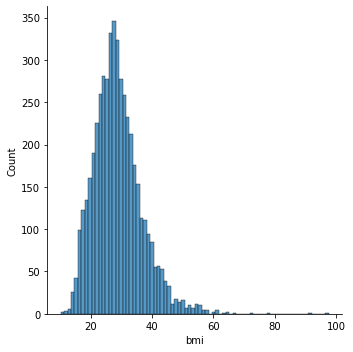

In [43]:
sns.displot(data.bmi)
plt.show()

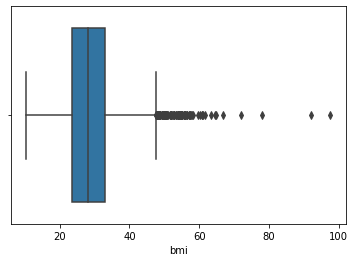

In [44]:
sns.boxplot(data.bmi)
plt.show()

In [45]:
len(data[data['bmi'] > 65])

5

- It is clearly seen that few values are crossing the general range.
- But according to sources our maximum BMI value present(97.6) is a possible one. Hence we won't remove the values.

In [46]:
data.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,stroke,AgeGroup,GlucoseLevelRange
0,Male,0,1,Yes,Private,Urban,36.6,formerly smoked,1,60-80,200-250
2,Male,0,1,Yes,Private,Rural,32.5,never smoked,1,80+,100-150
3,Female,0,0,Yes,Private,Urban,34.4,smokes,1,40-60,150-200
4,Female,1,0,Yes,Self-employed,Rural,24.0,never smoked,1,60-80,150-200
5,Male,0,0,Yes,Private,Urban,29.0,formerly smoked,1,80+,150-200


In [47]:
bins = [0, 19, 25, 30, 40, 1000]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese', 'ExtObese']
data['BMIGroup'] = pd.cut(data['bmi'], bins=bins, labels=labels, right=False)

In [48]:
data.drop('bmi', axis=1, inplace=True)

In [49]:
data.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,AgeGroup,GlucoseLevelRange,BMIGroup
0,Male,0,1,Yes,Private,Urban,formerly smoked,1,60-80,200-250,Obese
2,Male,0,1,Yes,Private,Rural,never smoked,1,80+,100-150,Obese
3,Female,0,0,Yes,Private,Urban,smokes,1,40-60,150-200,Obese
4,Female,1,0,Yes,Self-employed,Rural,never smoked,1,60-80,150-200,Normal
5,Male,0,0,Yes,Private,Urban,formerly smoked,1,80+,150-200,Overweight


#### Since our dataset is cleaned, we can proceed with preparing the data.

### Data Preparation:


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             4908 non-null   object  
 1   hypertension       4908 non-null   int64   
 2   heart_disease      4908 non-null   int64   
 3   ever_married       4908 non-null   object  
 4   work_type          4908 non-null   object  
 5   Residence_type     4908 non-null   object  
 6   smoking_status     4908 non-null   object  
 7   stroke             4908 non-null   int64   
 8   AgeGroup           4908 non-null   category
 9   GlucoseLevelRange  4908 non-null   category
 10  BMIGroup           4908 non-null   category
dtypes: category(3), int64(3), object(5)
memory usage: 360.1+ KB


In [51]:
var_list = ['ever_married']
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function
data[var_list] = data[var_list].apply(binary_map)

In [52]:
data.tail()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,AgeGroup,GlucoseLevelRange,BMIGroup
5104,Female,0,0,0,children,Rural,Unknown,0,0-20,100-150,Underweight
5106,Female,0,0,1,Self-employed,Urban,never smoked,0,80+,100-150,ExtObese
5107,Female,0,0,1,Self-employed,Rural,never smoked,0,20-40,< 100,Obese
5108,Male,0,0,1,Private,Rural,formerly smoked,0,40-60,150-200,Overweight
5109,Female,0,0,1,Govt_job,Urban,Unknown,0,40-60,< 100,Overweight


In [53]:
# Creating dummy variables for all categorical variables:

dummy1 = pd.get_dummies(data[['gender', 'work_type', 'Residence_type', 'smoking_status', 'AgeGroup', 'GlucoseLevelRange', 'BMIGroup']], drop_first=True)

In [54]:
dummy1.head()

,gender_Male,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,AgeGroup_20-40,...,AgeGroup_60-80,AgeGroup_80+,GlucoseLevelRange_100-150,GlucoseLevelRange_150-200,GlucoseLevelRange_200-250,GlucoseLevelRange_250+,BMIGroup_Normal,BMIGroup_Overweight,BMIGroup_Obese,BMIGroup_ExtObese
0,1,0,1,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,1,0,1,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,1,0
3,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
5,1,0,1,0,0,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [55]:
data = pd.concat([data, dummy1], axis=1)

In [56]:
data.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,AgeGroup,GlucoseLevelRange,...,AgeGroup_60-80,AgeGroup_80+,GlucoseLevelRange_100-150,GlucoseLevelRange_150-200,GlucoseLevelRange_200-250,GlucoseLevelRange_250+,BMIGroup_Normal,BMIGroup_Overweight,BMIGroup_Obese,BMIGroup_ExtObese
0,Male,0,1,1,Private,Urban,formerly smoked,1,60-80,200-250,...,1,0,0,0,1,0,0,0,1,0
2,Male,0,1,1,Private,Rural,never smoked,1,80+,100-150,...,0,1,1,0,0,0,0,0,1,0
3,Female,0,0,1,Private,Urban,smokes,1,40-60,150-200,...,0,0,0,1,0,0,0,0,1,0
4,Female,1,0,1,Self-employed,Rural,never smoked,1,60-80,150-200,...,1,0,0,1,0,0,1,0,0,0
5,Male,0,0,1,Private,Urban,formerly smoked,1,80+,150-200,...,0,1,0,1,0,0,0,1,0,0


In [57]:
strokedf = data.copy()

In [58]:
strokedf = strokedf.drop(['gender', 'work_type', 'Residence_type', 'smoking_status', 'AgeGroup', 'GlucoseLevelRange', 'BMIGroup'], axis=1)

In [59]:
strokedf.head()

,hypertension,heart_disease,ever_married,stroke,gender_Male,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,...,AgeGroup_60-80,AgeGroup_80+,GlucoseLevelRange_100-150,GlucoseLevelRange_150-200,GlucoseLevelRange_200-250,GlucoseLevelRange_250+,BMIGroup_Normal,BMIGroup_Overweight,BMIGroup_Obese,BMIGroup_ExtObese
0,0,1,1,1,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
2,0,1,1,1,1,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0
3,0,0,1,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,1,0,1,1,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
5,0,0,1,1,1,0,1,0,0,1,...,0,1,0,1,0,0,0,1,0,0


In [60]:
strokedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   hypertension                    4908 non-null   int64
 1   heart_disease                   4908 non-null   int64
 2   ever_married                    4908 non-null   int64
 3   stroke                          4908 non-null   int64
 4   gender_Male                     4908 non-null   uint8
 5   work_type_Never_worked          4908 non-null   uint8
 6   work_type_Private               4908 non-null   uint8
 7   work_type_Self-employed         4908 non-null   uint8
 8   work_type_children              4908 non-null   uint8
 9   Residence_type_Urban            4908 non-null   uint8
 10  smoking_status_formerly smoked  4908 non-null   uint8
 11  smoking_status_never smoked     4908 non-null   uint8
 12  smoking_status_smokes           4908 non-null   uint8
 13  Age

In [61]:
strokedf.isnull().sum()

hypertension                      0
heart_disease                     0
ever_married                      0
stroke                            0
gender_Male                       0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
AgeGroup_20-40                    0
AgeGroup_40-60                    0
AgeGroup_60-80                    0
AgeGroup_80+                      0
GlucoseLevelRange_100-150         0
GlucoseLevelRange_150-200         0
GlucoseLevelRange_200-250         0
GlucoseLevelRange_250+            0
BMIGroup_Normal                   0
BMIGroup_Overweight               0
BMIGroup_Obese                    0
BMIGroup_ExtObese                 0
dtype: int64

### Test-Train-Split:

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
# Assigning all the feature variables to X:
X = strokedf.drop(['stroke'], axis=1)

In [64]:
# Assigning the target variable to y:
y = strokedf['stroke']

In [65]:
X.head()

,hypertension,heart_disease,ever_married,gender_Male,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,...,AgeGroup_60-80,AgeGroup_80+,GlucoseLevelRange_100-150,GlucoseLevelRange_150-200,GlucoseLevelRange_200-250,GlucoseLevelRange_250+,BMIGroup_Normal,BMIGroup_Overweight,BMIGroup_Obese,BMIGroup_ExtObese
0,0,1,1,1,0,1,0,0,1,1,...,1,0,0,0,1,0,0,0,1,0
2,0,1,1,1,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
3,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,1,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
5,0,0,1,1,0,1,0,0,1,1,...,0,1,0,1,0,0,0,1,0,0


In [66]:
y.head()

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [67]:
# Splitting data into Test & Train set:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Since we dont have any continuous variables, we can skip the feature scaling part.

In [68]:
stroke = (sum(strokedf['stroke'])/len(strokedf['stroke'].index))*100
stroke

4.258353708231459

#### We have a 4.3% Stroke rate

In [69]:
strokedf.stroke.value_counts()

0    4699
1     209
Name: stroke, dtype: int64

In [70]:
# We can reduce the non-stroke sample number to balance the ratio:

shuffled_data = strokedf.sample(random_state=4)
stroke_yes = strokedf.loc[strokedf['stroke'] == 1]
stroke_no = strokedf.loc[strokedf['stroke'] == 0].sample(n= 1500,random_state= 101)

norm_strokedf = pd.concat([stroke_yes, stroke_no])

In [71]:
norm_strokedf.head()

,hypertension,heart_disease,ever_married,stroke,gender_Male,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,...,AgeGroup_60-80,AgeGroup_80+,GlucoseLevelRange_100-150,GlucoseLevelRange_150-200,GlucoseLevelRange_200-250,GlucoseLevelRange_250+,BMIGroup_Normal,BMIGroup_Overweight,BMIGroup_Obese,BMIGroup_ExtObese
0,0,1,1,1,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
2,0,1,1,1,1,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0
3,0,0,1,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,1,0,1,1,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
5,0,0,1,1,1,0,1,0,0,1,...,0,1,0,1,0,0,0,1,0,0


In [72]:
stroke1 = (sum(norm_strokedf['stroke'])/len(norm_strokedf['stroke'].index))*100
stroke1

12.229373902867174

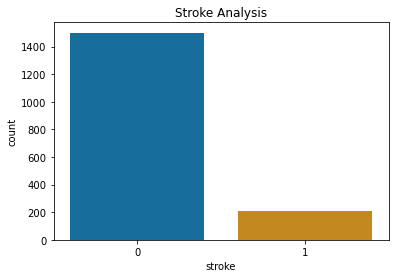

In [73]:
sns.countplot('stroke', data= norm_strokedf, palette= "colorblind")
plt.title('Stroke Analysis')
plt.show()

### Let's see the correlation:


In [74]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

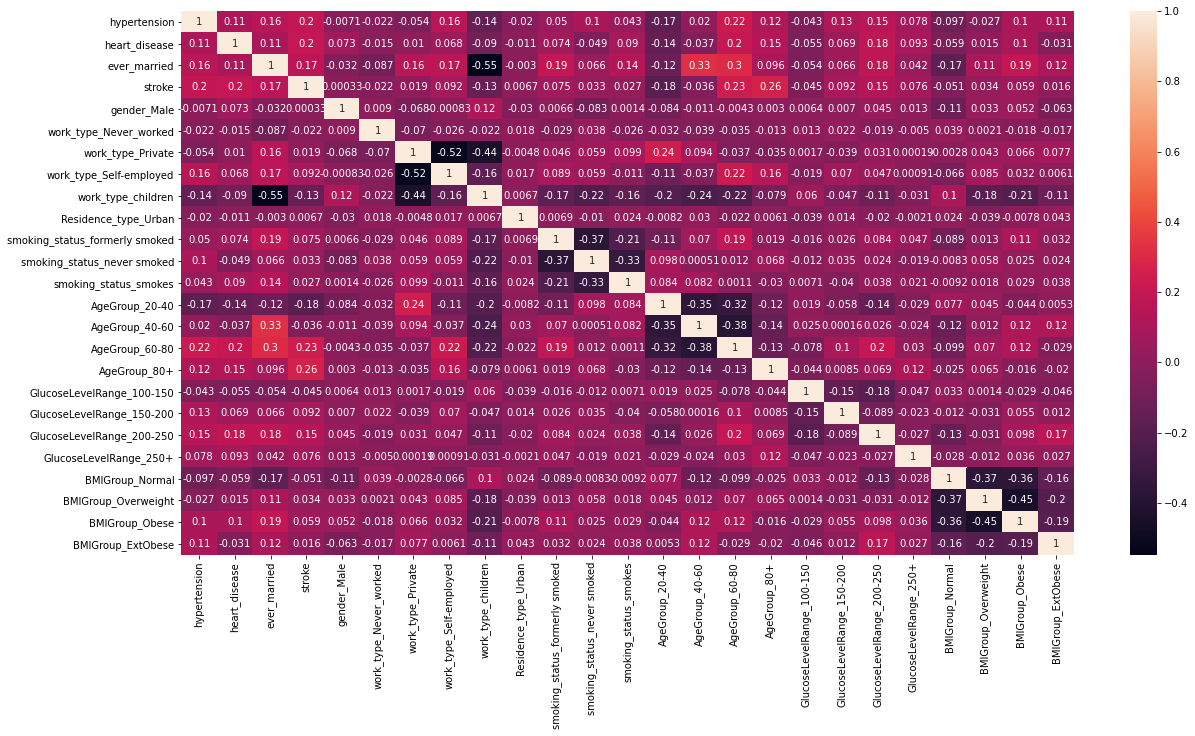

In [75]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(norm_strokedf.corr(),annot = True)
plt.show()

In [76]:
norm_strokedf.columns

Index(['hypertension', 'heart_disease', 'ever_married', 'stroke',
       'gender_Male', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'AgeGroup_20-40', 'AgeGroup_40-60',
       'AgeGroup_60-80', 'AgeGroup_80+', 'GlucoseLevelRange_100-150',
       'GlucoseLevelRange_150-200', 'GlucoseLevelRange_200-250',
       'GlucoseLevelRange_250+', 'BMIGroup_Normal', 'BMIGroup_Overweight',
       'BMIGroup_Obese', 'BMIGroup_ExtObese'],
      dtype='object')

In [77]:
# Lets remove some highly correlated variables:

X_test = X_test.drop(['work_type_children','work_type_Private','BMIGroup_Overweight', 'BMIGroup_Normal', 'AgeGroup_20-40', 'smoking_status_never smoked'], axis=1)
X_train = X_train.drop(['work_type_children','work_type_Private','BMIGroup_Overweight', 'BMIGroup_Normal', 'AgeGroup_20-40', 'smoking_status_never smoked'], axis=1)

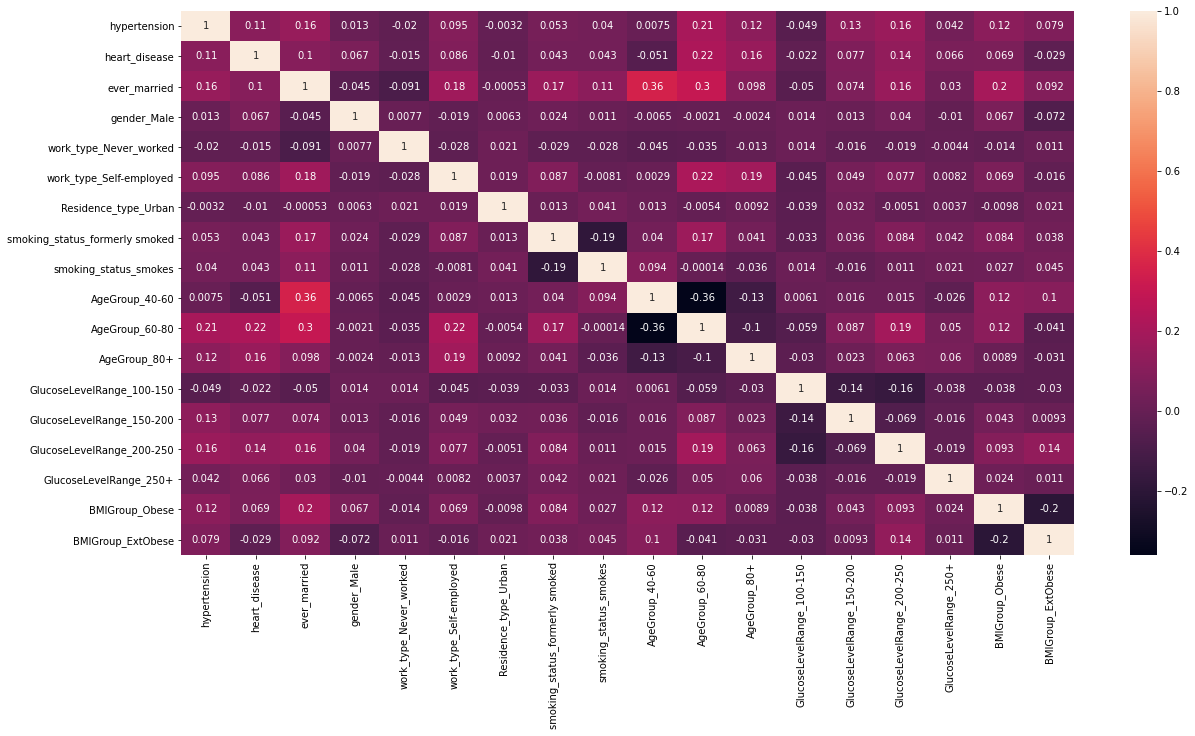

In [78]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Model Building:



In [79]:
import statsmodels.api as sm

In [80]:
# Logistic regression model
logmod1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logmod1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 3435
Model:                            GLM   Df Residuals:                     3416
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -496.56
Date:                Thu, 20 May 2021   Deviance:                       993.12
Time:                        10:17:19   Pearson chi2:                 3.11e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -6.0773      0.534    -11.371      0.000      -7.125      -5.030
hypertension                       0.5261      0.213      2.476      0.013       0.110       0.943
heart_disease                      0.6307      0.241      2.613      0.009       0.158       1.104
ever_married                       0.0574      0.308      0.186      0.852      -0.547       0.661
gender_Male                       -0.0720      0.182     -0.395      0.693      -0.429       0.285
work_type_Never_worked           -16.6189   1.24e+04     -0.001      0.999   -2.44e+04    2.43e+04
work_type_Self-employed           -0.0679      0.205     -0.331      0.741      -0.470       0.334
Residence_type_Urban               0.2508      0.178      1.408      0.159      -0.098       0.600
smoking_status_formerly smoked     0.2198      0.206      1.068      0.285      -0.183       0.623
smoking_status_smokes             -0.0754      0.262     -0.288      0.773      -0.588       0.437
AgeGroup_40-60                     2.4500      0.558      4.391      0.000       1.356       3.544
AgeGroup_60-80                     3.2504      0.557      5.841      0.000       2.160       4.341
AgeGroup_80+                       4.0805      0.595      6.861      0.000       2.915       5.246
GlucoseLevelRange_100-150         -0.0864      0.248     -0.348      0.728      -0.573       0.400
GlucoseLevelRange_150-200          0.5616      0.291      1.931      0.054      -0.008       1.132
GlucoseLevelRange_200-250          0.6774      0.242      2.795      0.005       0.202       1.152
GlucoseLevelRange_250+             1.2910      0.642      2.010      0.044       0.032       2.550
BMIGroup_Obese                     0.0158      0.191      0.083      0.934      -0.359       0.391
BMIGroup_ExtObese                  0.1130      0.312      0.363      0.717      -0.498       0.724
==================================================================================================
"""

### Feature Selection using RFE:

In [81]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [82]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)
rfe = rfe.fit(X_train, y_train)

In [83]:
rfe.support_

array([ True,  True,  True, False, False, False, False,  True, False,
        True,  True,  True, False,  True,  True,  True, False, False])

In [84]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('hypertension', True, 1),
 ('heart_disease', True, 1),
 ('ever_married', True, 1),
 ('gender_Male', False, 6),
 ('work_type_Never_worked', False, 5),
 ('work_type_Self-employed', False, 9),
 ('Residence_type_Urban', False, 2),
 ('smoking_status_formerly smoked', True, 1),
 ('smoking_status_smokes', False, 7),
 ('AgeGroup_40-60', True, 1),
 ('AgeGroup_60-80', True, 1),
 ('AgeGroup_80+', True, 1),
 ('GlucoseLevelRange_100-150', False, 3),
 ('GlucoseLevelRange_150-200', True, 1),
 ('GlucoseLevelRange_200-250', True, 1),
 ('GlucoseLevelRange_250+', True, 1),
 ('BMIGroup_Obese', False, 8),
 ('BMIGroup_ExtObese', False, 4)]

In [85]:
col = X_train.columns[rfe.support_]

In [86]:
X_train.columns[~rfe.support_]

Index(['gender_Male', 'work_type_Never_worked', 'work_type_Self-employed',
       'Residence_type_Urban', 'smoking_status_smokes',
       'GlucoseLevelRange_100-150', 'BMIGroup_Obese', 'BMIGroup_ExtObese'],
      dtype='object')

In [87]:
X_train_sm = sm.add_constant(X_train[col])
logmod2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmod2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 3435
Model:                            GLM   Df Residuals:                     3424
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -497.93
Date:                Thu, 20 May 2021   Deviance:                       995.87
Time:                        10:17:19   Pearson chi2:                 3.19e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -6.0026      0.512    -11.726      0.000      -7.006      -4.999
hypertension                       0.5361      0.210      2.552      0.011       0.124       0.948
heart_disease                      0.5982      0.238      2.508      0.012       0.131       1.066
ever_married                       0.0357      0.308      0.116      0.908      -0.568       0.639
smoking_status_formerly smoked     0.2394      0.198      1.212      0.226      -0.148       0.627
AgeGroup_40-60                     2.4694      0.556      4.440      0.000       1.379       3.560
AgeGroup_60-80                     3.2485      0.555      5.855      0.000       2.161       4.336
AgeGroup_80+                       4.0793      0.587      6.946      0.000       2.928       5.230
GlucoseLevelRange_150-200          0.6091      0.281      2.166      0.030       0.058       1.160
GlucoseLevelRange_200-250          0.7125      0.227      3.142      0.002       0.268       1.157
GlucoseLevelRange_250+             1.3135      0.637      2.062      0.039       0.065       2.562
==================================================================================================
"""

In [88]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1914    0.029382
4378    0.002466
543     0.029382
4986    0.100937
4885    0.002556
1401    0.029382
4444    0.002556
1704    0.005016
1659    0.108198
2487    0.061897
dtype: float64

In [89]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.02938204, 0.00246621, 0.02938204, 0.10093743, 0.00255554,
       0.02938204, 0.00255554, 0.00501582, 0.10819769, 0.06189658])

##### Creating a dataframe with the actual stroke flag and the predicted probabilities

In [90]:
y_train_pred_final = pd.DataFrame({'Stroke':y_train.values, 'Stroke_Prob':y_train_pred})
y_train_pred_final['pID'] = y_train.index
y_train_pred_final.head()

,Stroke,Stroke_Prob,pID
0,0,0.029382,1914
1,0,0.002466,4378
2,0,0.029382,543
3,0,0.100937,4986
4,0,0.002556,4885


##### Creating new column 'predicted' with 1 if Stroke_Prob > 0.3 else 0

In [91]:
y_train_pred_final['predicted'] = y_train_pred_final.Stroke_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Let's see the head
y_train_pred_final.head()

,Stroke,Stroke_Prob,pID,predicted
0,0,0.029382,1914,0
1,0,0.002466,4378,0
2,0,0.029382,543,0
3,0,0.100937,4986,0
4,0,0.002556,4885,0


In [92]:
from sklearn import metrics

In [93]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Stroke, y_train_pred_final.predicted )
print(confusion)

[[3257   29]
 [ 142    7]]


In [94]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Stroke, y_train_pred_final.predicted))

0.9502183406113537


#### Checking VIFs

In [95]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,ever_married,3.67
4,AgeGroup_40-60,2.47
5,AgeGroup_60-80,2.34
3,smoking_status_formerly smoked,1.25
6,AgeGroup_80+,1.24
0,hypertension,1.22
8,GlucoseLevelRange_200-250,1.18
1,heart_disease,1.17
7,GlucoseLevelRange_150-200,1.10
9,GlucoseLevelRange_250+,1.02


In [97]:
# Dropping variable with high p-value:

col = col.drop('ever_married', 1)
col

Index(['hypertension', 'heart_disease', 'smoking_status_formerly smoked',
       'AgeGroup_40-60', 'AgeGroup_60-80', 'AgeGroup_80+',
       'GlucoseLevelRange_150-200', 'GlucoseLevelRange_200-250',
       'GlucoseLevelRange_250+'],
      dtype='object')

In [98]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logmod3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmod3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 3435
Model:                            GLM   Df Residuals:                     3425
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -497.94
Date:                Thu, 20 May 2021   Deviance:                       995.88
Time:                        10:17:19   Pearson chi2:                 3.20e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -5.9908      0.501    -11.948      0.000      -6.974      -5.008
hypertension                       0.5358      0.210      2.551      0.011       0.124       0.947
heart_disease                      0.5960      0.238      2.507      0.012       0.130       1.062
smoking_status_formerly smoked     0.2405      0.197      1.218      0.223      -0.146       0.627
AgeGroup_40-60                     2.4898      0.528      4.718      0.000       1.455       3.524
AgeGroup_60-80                     3.2695      0.525      6.231      0.000       2.241       4.298
AgeGroup_80+                       4.0999      0.560      7.321      0.000       3.002       5.198
GlucoseLevelRange_150-200          0.6090      0.281      2.165      0.030       0.058       1.160
GlucoseLevelRange_200-250          0.7136      0.227      3.150      0.002       0.270       1.158
GlucoseLevelRange_250+             1.3147      0.637      2.065      0.039       0.067       2.563
==================================================================================================
"""

In [99]:
# Dropping variable with high p-value:

col = col.drop('smoking_status_formerly smoked', 1)
col

Index(['hypertension', 'heart_disease', 'AgeGroup_40-60', 'AgeGroup_60-80',
       'AgeGroup_80+', 'GlucoseLevelRange_150-200',
       'GlucoseLevelRange_200-250', 'GlucoseLevelRange_250+'],
      dtype='object')

In [100]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logmod4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmod4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 3435
Model:                            GLM   Df Residuals:                     3426
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -498.66
Date:                Thu, 20 May 2021   Deviance:                       997.32
Time:                        10:17:19   Pearson chi2:                 3.27e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -5.9697      0.501    -11.915      0.000      -6.952      -4.988
hypertension                  0.5313      0.210      2.530      0.011       0.120       0.943
heart_disease                 0.5888      0.237      2.481      0.013       0.124       1.054
AgeGroup_40-60                2.5162      0.527      4.773      0.000       1.483       3.550
AgeGroup_60-80                3.3186      0.523      6.346      0.000       2.294       4.343
AgeGroup_80+                  4.1385      0.559      7.402      0.000       3.043       5.234
GlucoseLevelRange_150-200     0.6237      0.280      2.224      0.026       0.074       1.173
GlucoseLevelRange_200-250     0.7277      0.226      3.217      0.001       0.284       1.171
GlucoseLevelRange_250+        1.3339      0.638      2.092      0.036       0.084       2.584
=============================================================================================
"""

In [101]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1914    0.030665
4378    0.002548
543     0.030665
4986    0.105552
4885    0.002548
1401    0.030665
4444    0.002548
1704    0.005262
1659    0.116347
2487    0.065919
dtype: float64

In [102]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.03066487, 0.00254844, 0.03066487, 0.10555197, 0.00254844,
       0.03066487, 0.00254844, 0.00526188, 0.1163474 , 0.0659186 ])

##### Creating a dataframe with the actual stroke flag and the predicted probabilities

In [103]:
y_train_pred_final = pd.DataFrame({'Stroke':y_train.values, 'Stroke_Prob':y_train_pred})
y_train_pred_final['pID'] = y_train.index
y_train_pred_final.head()

,Stroke,Stroke_Prob,pID
0,0,0.030665,1914
1,0,0.002548,4378
2,0,0.030665,543
3,0,0.105552,4986
4,0,0.002548,4885


##### Creating new column 'predicted' with 1 if Stroke_Prob > 0.3 else 0

In [104]:
y_train_pred_final['predicted'] = y_train_pred_final.Stroke_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Let's see the head
y_train_pred_final.head()

,Stroke,Stroke_Prob,pID,predicted
0,0,0.030665,1914,0
1,0,0.002548,4378,0
2,0,0.030665,543,0
3,0,0.105552,4986,0
4,0,0.002548,4885,0


In [105]:
from sklearn import metrics

In [106]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Stroke, y_train_pred_final.predicted )
print(confusion)

[[3254   32]
 [ 141    8]]


In [107]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Stroke, y_train_pred_final.predicted))

0.9496360989810771


#### Checking VIFs

In [108]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [109]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,AgeGroup_60-80,1.31
0,hypertension,1.22
6,GlucoseLevelRange_200-250,1.18
1,heart_disease,1.17
2,AgeGroup_40-60,1.09
4,AgeGroup_80+,1.09
5,GlucoseLevelRange_150-200,1.09
7,GlucoseLevelRange_250+,1.02


### Sensitivity and Specificity

In [110]:
TP = confusion[1,1] # True Positive 
TN = confusion[0,0] # True Negatives
FP = confusion[0,1] # False Positives
FN = confusion[1,0] # False Negatives

In [111]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.053691275167785234

In [112]:
# Let us calculate specificity
TN / float(TN+FP)

0.9902617163724894

In [113]:
# Calculate false postive rate - predicting stroke when patient does not have stroke
print(FP/ float(TN+FP))

0.009738283627510651


In [114]:
# positive predictive value 
print (TP / float(TP+FP))

0.2


In [115]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9584683357879235


### Plotting the ROC Curve

In [116]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [117]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Stroke, y_train_pred_final.Stroke_Prob, drop_intermediate = False )

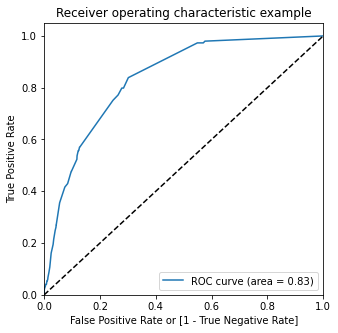

In [118]:
draw_roc(y_train_pred_final.Stroke, y_train_pred_final.Stroke_Prob)

##### The curve looks good

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [119]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Stroke_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Stroke,Stroke_Prob,pID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.030665,1914,0,1,0,0,0,0,0,0,0,0,0
1,0,0.002548,4378,0,1,0,0,0,0,0,0,0,0,0
2,0,0.030665,543,0,1,0,0,0,0,0,0,0,0,0
3,0,0.105552,4986,0,1,1,0,0,0,0,0,0,0,0
4,0,0.002548,4885,0,1,0,0,0,0,0,0,0,0,0


In [120]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Stroke, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.043377  1.000000  0.000000
0.1   0.1  0.864047  0.557047  0.877967
0.2   0.2  0.939738  0.161074  0.975046
0.3   0.3  0.949636  0.053691  0.990262
0.4   0.4  0.956914  0.020134  0.999391
0.5   0.5  0.956623  0.006711  0.999696
0.6   0.6  0.956623  0.000000  1.000000
0.7   0.7  0.956623  0.000000  1.000000
0.8   0.8  0.956623  0.000000  1.000000
0.9   0.9  0.956623  0.000000  1.000000


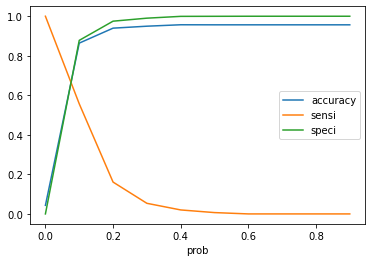

In [121]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.08 is the optimum point to take it as a cutoff probability.

In [122]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Stroke_Prob.map( lambda x: 1 if x > 0.08 else 0)

y_train_pred_final.head()

,Stroke,Stroke_Prob,pID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.030665,1914,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.002548,4378,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.030665,543,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.105552,4986,0,1,1,0,0,0,0,0,0,0,0,1
4,0,0.002548,4885,0,1,0,0,0,0,0,0,0,0,0,0


In [123]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Stroke, y_train_pred_final.final_predicted)

0.8593886462882097

In [124]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Stroke, y_train_pred_final.final_predicted )
confusion2

array([[2867,  419],
       [  64,   85]], dtype=int64)

In [125]:
TP = confusion2[1,1] # True Positive 
TN = confusion2[0,0] # true Negatives
FP = confusion2[0,1] # False Positives
FN = confusion2[1,0] # False Negatives

In [126]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5704697986577181

In [127]:
# Let us calculate specificity
TN / float(TN+FP)

0.8724893487522825

In [128]:
# Calculate false postive rate - predicting stroke when patient does not have stroke
print(FP/ float(TN+FP))

0.1275106512477176


In [129]:
# Positive predictive value 
print (TP / float(TP+FP))

0.16865079365079366


In [130]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9781644489935176


#### We will also check the Precision-Recall for our model and make final call on which method to go with


## Precision and Recall

In [131]:
confusion = metrics.confusion_matrix(y_train_pred_final.Stroke, y_train_pred_final.predicted )
confusion

array([[3254,   32],
       [ 141,    8]], dtype=int64)

#### Precision
TP / TP + FP

In [132]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.2

#### Recall
TP / TP + FN

In [133]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.053691275167785234

##### Using sklearn metrics

In [134]:
from sklearn.metrics import precision_score, recall_score

In [135]:
precision_score(y_train_pred_final.Stroke, y_train_pred_final.predicted)

0.2

In [136]:
recall_score(y_train_pred_final.Stroke, y_train_pred_final.predicted)

0.053691275167785234

### Precision and Recall tradeoff

In [137]:
from sklearn.metrics import precision_recall_curve

In [138]:
# y_train_pred_final.Stroke, y_train_pred_final.predicted

In [139]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Stroke, y_train_pred_final.Stroke_Prob)

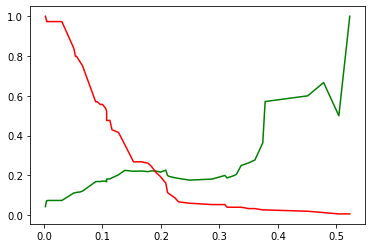

In [140]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###  Making predictions on the Test set

In [141]:
X_test = X_test[col]
X_test.head()

,hypertension,heart_disease,AgeGroup_40-60,AgeGroup_60-80,AgeGroup_80+,GlucoseLevelRange_150-200,GlucoseLevelRange_200-250,GlucoseLevelRange_250+
2083,1,0,0,0,0,0,0,0
3370,0,0,0,0,0,0,0,0
542,0,0,1,0,0,0,0,0
5020,0,0,0,0,0,0,0,0
3851,0,0,0,0,0,0,0,0


In [142]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [143]:
y_test_pred = res.predict(X_test_sm)

In [144]:
y_test_pred[:10]

2083    0.004328
3370    0.002548
542     0.030665
5020    0.002548
3851    0.002548
2099    0.030665
738     0.065919
475     0.138089
1512    0.005262
1716    0.002548
dtype: float64

In [145]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [146]:
# Let's see the head
y_pred_1.head()

,0
2083,0.004328
3370,0.002548
542,0.030665
5020,0.002548
3851,0.002548


In [147]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [148]:
# Putting pID to index
y_test_df['pID'] = y_test_df.index

In [149]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [150]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [151]:
y_pred_final.head()

,stroke,pID,0
0,0,2083,0.004328
1,0,3370,0.002548
2,0,542,0.030665
3,0,5020,0.002548
4,0,3851,0.002548


In [152]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Stroke_Prob'})

In [153]:
# Let's see the head of y_pred_final
y_pred_final.head()

,stroke,pID,Stroke_Prob
0,0,2083,0.004328
1,0,3370,0.002548
2,0,542,0.030665
3,0,5020,0.002548
4,0,3851,0.002548


In [154]:
y_pred_final['final_predicted'] = y_pred_final.Stroke_Prob.map(lambda x: 1 if x > 0.08 else 0)

In [155]:
y_pred_final.head()

,stroke,pID,Stroke_Prob,final_predicted
0,0,2083,0.004328,0
1,0,3370,0.002548,0
2,0,542,0.030665,0
3,0,5020,0.002548,0
4,0,3851,0.002548,0


In [156]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.stroke, y_pred_final.final_predicted)

0.8458927359131025

In [157]:
confusion2 = metrics.confusion_matrix(y_pred_final.stroke, y_pred_final.final_predicted )
confusion2

array([[1211,  202],
       [  25,   35]], dtype=int64)

In [158]:
TP = confusion2[1,1] # True Positive 
TN = confusion2[0,0] # True Negatives
FP = confusion2[0,1] # Talse Positives
FN = confusion2[1,0] # Talse Negatives

#### We go with the Sensitivity Specificity Evaluation as the Percision-Recall was not suiting our set

In [159]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5833333333333334

In [160]:
# Let us calculate specificity
TN / float(TN+FP)

0.8570417551309271

In [161]:
X_test.columns.values

array(['hypertension', 'heart_disease', 'AgeGroup_40-60',
       'AgeGroup_60-80', 'AgeGroup_80+', 'GlucoseLevelRange_150-200',
       'GlucoseLevelRange_200-250', 'GlucoseLevelRange_250+'],
      dtype=object)

In [162]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 3435
Model:                            GLM   Df Residuals:                     3426
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -498.66
Date:                Thu, 20 May 2021   Deviance:                       997.32
Time:                        10:17:56   Pearson chi2:                 3.27e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -5.9697      0.501    -11.915      0.000      -6.952      -4.988
hypertension                  0.5313      0.210      2.530      0.011       0.120       0.943
heart_disease                 0.5888      0.237      2.481      0.013       0.124       1.054
AgeGroup_40-60                2.5162      0.527      4.773      0.000       1.483       3.550
AgeGroup_60-80                3.3186      0.523      6.346      0.000       2.294       4.343
AgeGroup_80+                  4.1385      0.559      7.402      0.000       3.043       5.234
GlucoseLevelRange_150-200     0.6237      0.280      2.224      0.026       0.074       1.173
GlucoseLevelRange_200-250     0.7277      0.226      3.217      0.001       0.284       1.171
GlucoseLevelRange_250+        1.3339      0.638      2.092      0.036       0.084       2.584
=============================================================================================
"""